In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,level_0,index,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,6516,0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,56.400000
2,2,2,8462,3,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,58.166667
3,3,3,8462,3,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,11391,0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,81.600000


In [4]:
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
tempDf = df[['year','term','module_domain','code_module','region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,module_domain,code_module,region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,3,0,0,NaN,NaN,NaN,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,2,0,0,81.0,565.0,58.166667,-137.0,2,261,0,0,3,3.0,90
10,0,1,1,3,1,1,0,NaN,NaN,NaN,-128.0,0,240,0,0,2,4.0,90
24,0,0,1,5,8,0,0,111.0,367.0,14.666667,-47.0,1,268,2,0,3,8.0,60
29,0,0,1,4,9,0,0,NaN,NaN,NaN,-61.0,1,268,0,0,1,0.0,30
32,0,0,1,3,6,0,0,8.0,347.0,35.250000,-74.0,0,261,0,0,1,6.0,60
40,0,0,1,3,1,1,1,64.0,728.0,74.958333,-134.0,0,261,0,0,1,3.0,60
41,0,0,1,3,10,1,0,24.0,305.0,52.166667,-190.0,1,261,0,0,3,1.0,70
52,0,0,1,5,5,0,0,146.0,4595.0,94.333333,-31.0,0,268,0,1,1,4.0,60
54,0,0,1,3,7,0,0,61.0,265.0,75.416667,-96.0,0,261,0,1,2,8.0,60


In [5]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.count()

year                          6216
term                          6216
module_domain                 6216
code_module                   6216
region                        6216
gender                        6216
disability                    6216
b4_sum_clicks                 6216
half_sum_clicks               6216
std_half_score                6216
date_registration             6216
age_band                      6216
module_presentation_length    6216
num_of_prev_attempts          6216
final_result                  6216
highest_education             6216
imd_band                      6216
studied_credits               6216
dtype: int64

In [64]:
# After dropping those missing values, we have 6216 observatios for the dataset
# Define our predictors
X=tempDf[['std_half_score','date_registration','b4_sum_clicks','half_sum_clicks','imd_band','region','highest_education','studied_credits']]
y=tempDf['final_result']

In [65]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

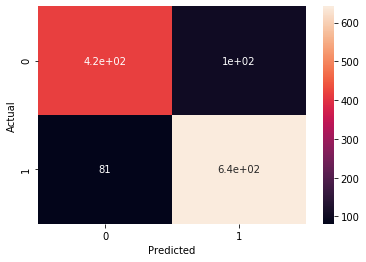

In [71]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [72]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8520900321543409


In [79]:
## Create a temporary data frame for Year 2014 Term J and Term B STEM class
tempDf2 = df[['year','term','module_domain','code_module','region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year ==1)&(tempDf2.module_domain==1)]
# Show first 20 observations of the dataset
tempDf2.head(20)

,year,term,module_domain,code_module,region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
3,1,0,1,3,2,0,0,NaN,NaN,NaN,-38.0,2,262,1,0,3,3.0,60
7,1,0,1,2,1,1,0,181.0,475.0,74.325000,-110.0,0,269,0,1,2,5.0,120
11,1,1,1,3,1,1,0,3.0,1069.0,57.333333,-54.0,0,241,1,1,2,4.0,60
15,1,1,1,4,4,0,0,51.0,757.0,84.555556,-47.0,0,241,0,1,3,9.0,60
16,1,0,1,2,0,1,0,201.0,796.0,3.900000,-114.0,0,269,0,0,3,4.0,60
17,1,0,1,3,2,1,0,8.0,105.0,14.000000,-68.0,0,262,2,0,3,1.0,150
23,1,1,1,5,2,1,0,308.0,8316.0,81.000000,-25.0,1,241,0,1,3,2.0,90
25,1,1,1,5,10,0,0,NaN,NaN,NaN,-73.0,1,241,0,0,1,0.0,60
30,1,0,1,2,10,0,0,28.0,1001.0,94.450000,-156.0,0,269,0,1,3,7.0,120
31,1,1,1,5,3,1,0,0.0,946.0,33.000000,-65.0,1,241,0,0,1,1.0,120


In [80]:
tempDf2=tempDf2.dropna()

In [81]:
df2 = pd.DataFrame(tempDf2,columns= ['b4_sum_clicks','std_half_score','date_registration','half_sum_clicks','imd_band','region','highest_education','studied_credits'])

In [82]:
X=tempDf[['b4_sum_clicks','std_half_score','date_registration','half_sum_clicks','imd_band','region','highest_education','studied_credits']]
y=tempDf['final_result']
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Start Random forest Modelling
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_new = regressor.predict(df2)
y_test_new=tempDf2['final_result']

In [83]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.558725531028738
